In [1]:
pip install pycaret[full]

In [2]:
#connect to google drive
from google.colab import drive
drive.mount("/content/gdrive")
sys_path=("/content/gdrive/MyDrive/Colab Notebooks/HRDataset.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#call dataset from drive
import pandas as pd
df =pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/HRDataset.csv")
df.head()
df.describe

<bound method NDFrame.describe of                 Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  Per

In [4]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(df, target = 'Salary')

,Description,Value
0,Session id,5788
1,Target,Salary
2,Target type,Regression
3,Original data shape,"(311, 36)"
4,Transformed data shape,"(311, 123)"
5,Transformed train set shape,"(217, 123)"
6,Transformed test set shape,"(94, 123)"
7,Ordinal features,1
8,Numeric features,17
9,Categorical features,18


In [5]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,12767.9358,629419351.0531,22591.0060,0.1730,0.2386,0.1594,0.3170
catboost,CatBoost Regressor,14848.0124,657587167.8395,23520.3161,0.0100,0.2622,0.2026,3.3470
et,Extra Trees Regressor,15149.4909,684201409.6686,24006.6566,0.0006,0.2665,0.2023,0.7270
rf,Random Forest Regressor,15955.9192,708324029.1054,24625.0319,-0.1045,0.2774,0.2154,0.4150
gbr,Gradient Boosting Regressor,16000.0031,714912949.4083,24759.4295,-0.1149,0.2791,0.2159,0.3320
ada,AdaBoost Regressor,15325.9918,744904062.3242,25232.1786,-0.1206,0.2796,0.1971,0.5590
lasso,Lasso Regression,16160.6223,737120235.6132,25249.4446,-0.1562,0.2837,0.2165,0.3000
lar,Least Angle Regression,16160.6224,737120239.8513,25249.4447,-0.1562,0.2837,0.2165,0.2670
en,Elastic Net,16160.6216,737120199.7551,25249.4439,-0.1562,0.2837,0.2165,0.4540
lr,Linear Regression,16160.6224,737120239.8513,25249.4447,-0.1562,0.2837,0.2165,0.9280


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [6]:
best

KNeighborsRegressor(n_jobs=-1)

In [7]:
et_classifier=create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15551.0509,705731640.9651,26565.6101,0.0172,0.2816,0.2001
1,12804.8627,361702412.1833,19018.4755,0.2715,0.2167,0.1660
2,7137.3427,74893283.4552,8654.0906,-0.6124,0.1405,0.1233
3,10901.6114,184284984.4329,13575.1606,0.0237,0.2022,0.1761
4,17555.0777,614889577.6902,24796.9671,0.1986,0.2923,0.2388
5,12744.8691,236598008.1616,15381.7427,0.0882,0.2337,0.2095
6,18683.9568,1194248563.6647,34557.9016,-0.0039,0.3368,0.2001
7,20876.1400,1769425477.3390,42064.5394,0.0094,0.3551,0.2345
8,15294.2371,349861099.6030,18704.5743,0.0281,0.2661,0.2464


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

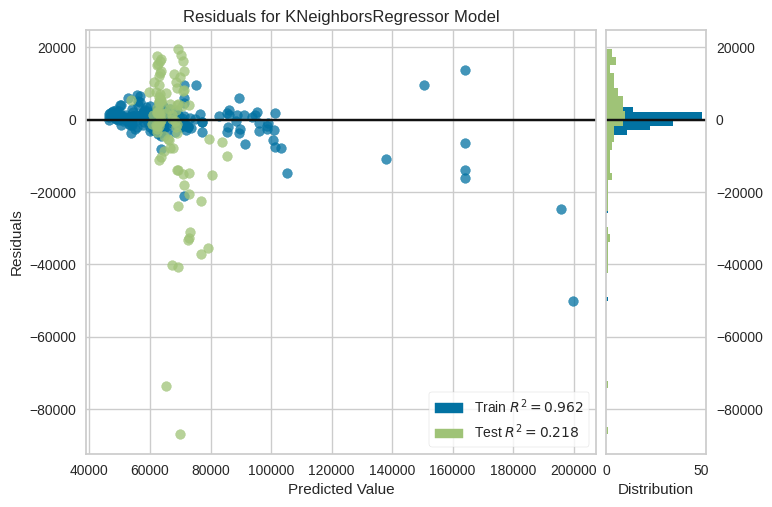

In [8]:
# plot residuals
plot_model(best, plot = 'residuals')

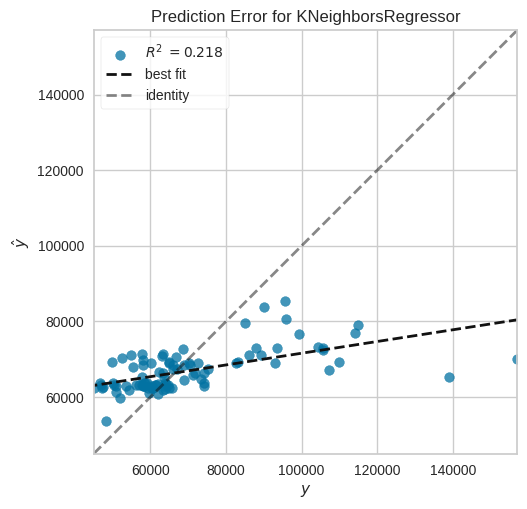

In [9]:
# plot error
plot_model(best, plot = 'error')

In [11]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,11297.0128,319418932.9430,17872.2951,0.2178,0.2116,0.1463


In [12]:
# show predictions df
holdout_pred.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Salary,prediction_label
275,"Tannen, Biff",10173,1,1,1,1,3,3,0,0,...,Indeed,Fully Meets,3.40,3,6,1/2/2019,0,14,90100,83824.6
119,"Gross, Paula",10059,0,2,0,5,5,3,0,1,...,CareerBuilder,Fully Meets,5.00,5,0,6/3/2013,0,17,63813,63652.0
115,"Gordon, David",10051,1,1,1,1,5,3,0,0,...,LinkedIn,Fully Meets,5.00,3,0,1/14/2019,0,2,48285,53799.4
58,"Crimmings, Jean",10132,0,0,0,2,5,3,0,0,...,LinkedIn,Fully Meets,4.12,5,0,1/28/2019,0,15,56149,63177.4
108,"Goble, Taisha",10246,0,0,0,4,3,3,0,1,...,Indeed,Fully Meets,4.60,4,4,1/20/2015,0,10,114800,79178.4


In [13]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['EmpID', 'MarriedID',
                                              'MaritalStatusID', 'GenderID',
                                              'EmpStatusID', 'DeptID',
                                              'PerfScoreID',
                                              'FromDiversityJobFairID', 'Termd',
                                              'PositionID', 'Zip', 'ManagerID',
                                              'EngagementSurvey',
                                              'EmpSatisfaction',
                                              'SpecialProjectsCount',
                                              'DaysLateLast30', 'Absences'],
                                     transformer=Simpl...
                 ('rest_encoding',
                  TransformerWrapper(include=['Employee_Name', 'Position', 'DOB',
                              

In [14]:
pip install gradio


In [15]:
pip install pycaret[mlops]

In [16]:
create_app(et_classifier)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>